In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'/Users/sneha_verma/Documents/Online Courses/Python A-Z/Module 6 - Advanced Visualization'

In [4]:
movies = pd.read_csv('P4-Movie-Ratings.csv')
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


## Exploratory Analysis

In [5]:
len(movies)

559

In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
movies.describe()
# Year is not useful as a numerical variable
# Object variables, not recognizeed as categorical variables.

# CATEGORY: Finite list of text values (no Python conversion)
# OBJECT: Text (string in Python)

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
# Let us convert the object variables to categories:
movies['Film'] = movies['Film'].astype('category')
movies['Genre'] = movies['Genre'].astype('category')
movies['Year'] = movies['Year'].astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [11]:
# To find unique values of categories:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

---

### CHART 1: Jointplots

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

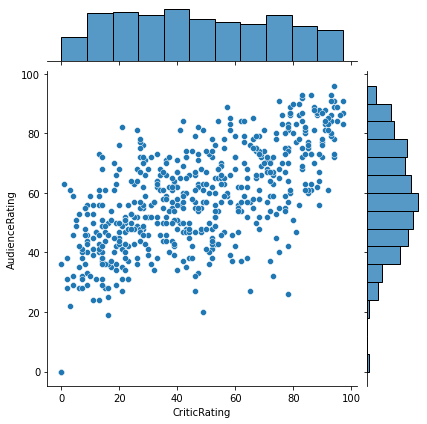

In [13]:
sns.jointplot(data = movies,
             x = 'CriticRating',
             y = 'AudienceRating'
             )
# chart 1

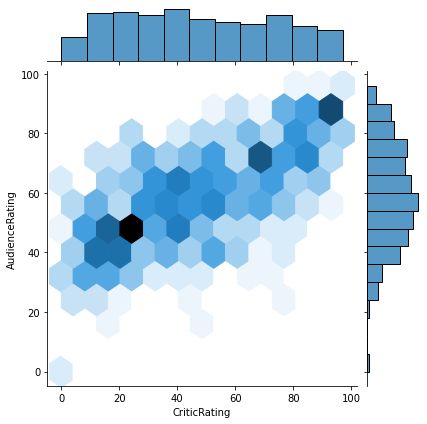

In [14]:
sns.jointplot(data = movies,
             x = 'CriticRating',
             y = 'AudienceRating',
             kind = 'hex')
# Hex shows the intensity of the clusters

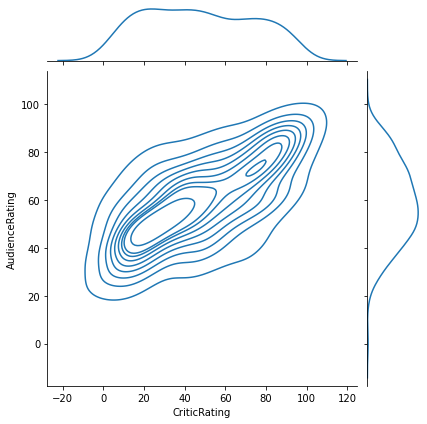

In [15]:
sns.jointplot(data = movies,
             x = 'CriticRating',
             y = 'AudienceRating',
             kind = 'kde')
# seems to show the outline of the distributions. 
# kde = kernel density estimation

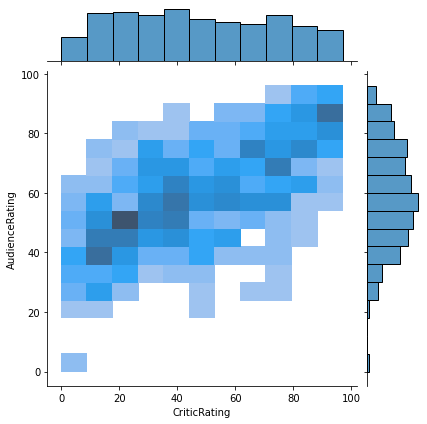

In [16]:
sns.jointplot(data = movies,
             x = 'CriticRating',
             y = 'AudienceRating',
             kind = 'hist')

# sort of like hex but with square boxes

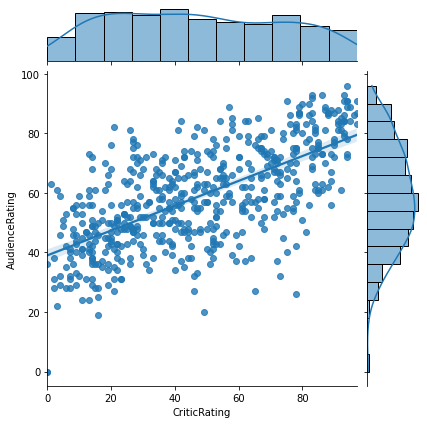

In [17]:
sns.jointplot(data = movies,
             x = 'CriticRating',
             y = 'AudienceRating',
             kind = 'reg')
# shows a regression line through the plot

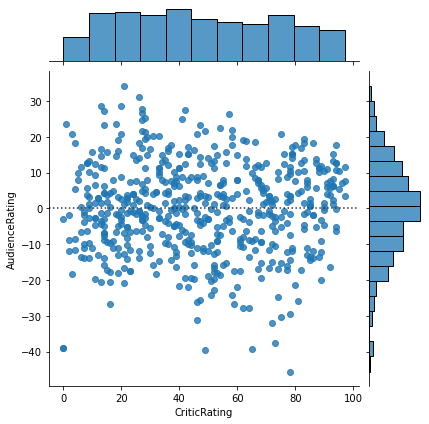

In [18]:
sns.jointplot(data = movies,
             x = 'CriticRating',
             y = 'AudienceRating',
             kind = 'resid')

# shows the residual distributions and points of the two variables (based on regression?)

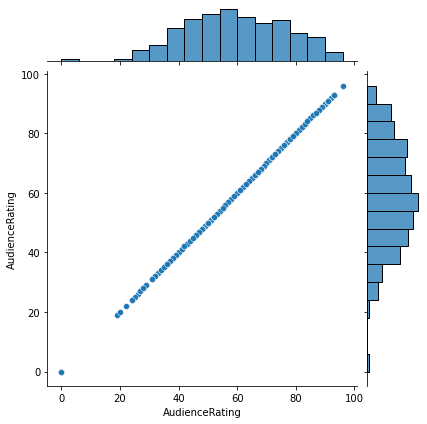

In [19]:
# same variable. SHows a straight line with the histograms having the same distributions
sns.jointplot(data = movies,
             x = 'AudienceRating',
             y = 'AudienceRating')

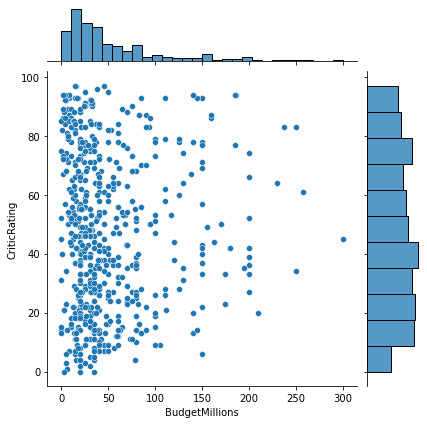

In [20]:
# Let us look at the relationship between Budget in millions and the Critic Rating along with their distributions

sns.jointplot(data = movies,
             x = 'BudgetMillions',
              y = 'CriticRating'
             )

# There does not seem to be a positive trend between the two which implies that the Critic rating
# does not depend on the budget of the movie.

### CHARTs 2 and 3: Histograms

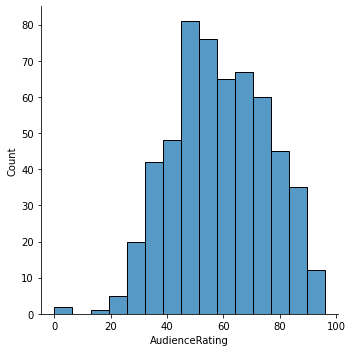

In [21]:
m1 = sns.displot(data = movies,
                x = 'AudienceRating',
                bins = 15)

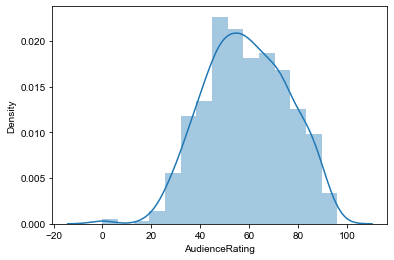

In [22]:
m1 = sns.distplot(movies['AudienceRating'], bins = 15)
sns.set_style('darkgrid')
# the line gives the probability density function.

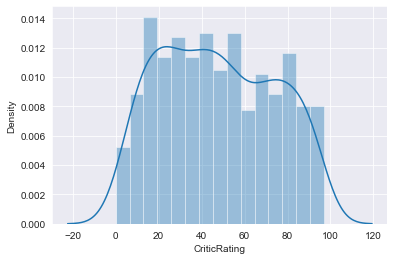

In [23]:
sns.set_style('darkgrid')
m2 = sns.distplot(movies['CriticRating'], bins = 15)

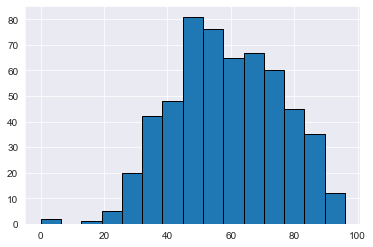

In [24]:
n1 = plt.hist(movies['AudienceRating'], bins = 15, edgecolor = 'black')
sns.set_style('darkgrid')
# chart 2

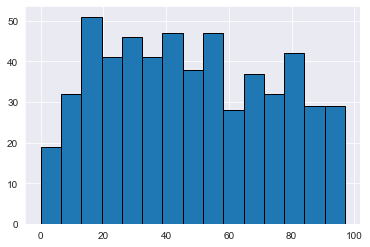

In [25]:
sns.set_style('darkgrid')
n1 = plt.hist(movies['CriticRating'], bins = 15, edgecolor = 'black')
# chart 3

### Chart 4: Stacked Histograms

In [26]:
# Filter datasets

movies[movies.Genre == 'Drama'].BudgetMillions
# shows BudgetMillions of the subset of dataset with Genre = Drama

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64

(array([4., 3., 6., 4., 4., 7., 0., 5., 3., 1., 2., 7., 1., 0., 2.]),
 array([ 1.        ,  4.26666667,  7.53333333, 10.8       , 14.06666667,
        17.33333333, 20.6       , 23.86666667, 27.13333333, 30.4       ,
        33.66666667, 36.93333333, 40.2       , 43.46666667, 46.73333333,
        50.        ]),
 <BarContainer object of 15 artists>)

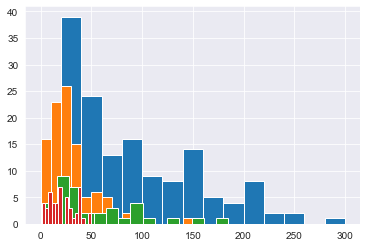

In [27]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == 'Horror'].BudgetMillions, bins = 15)

# the bars are overlapping

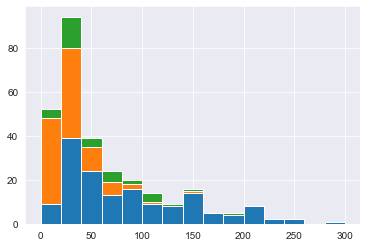

In [28]:
lst = [movies[movies.Genre == 'Action'].BudgetMillions,
       movies[movies.Genre == 'Drama'].BudgetMillions, 
       movies[movies.Genre == 'Thriller'].BudgetMillions]
plt.hist(lst, bins = 15, stacked = True)
plt.show()

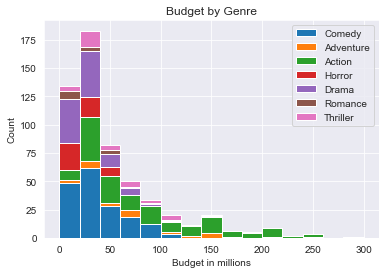

In [29]:
# the 'lst' variable seems repetitive. Let us use a loop instead:
labels = list()
lst = [] # or lst = list()
for gen in movies['Genre'].unique(): # or movies.Genre.cat.categories
    lst.append(movies[movies['Genre'] == gen].BudgetMillions)
    labels.append(gen)
    
plt.hist(lst, bins = 15, stacked = True, rwidth = 1, label = labels) # rwidth specifies the space between the bars
# label = requires a list of labels
plt.legend()
plt.xlabel('Budget in millions')
plt.ylabel('Count')
plt.title('Budget by Genre')
plt.show()
# chart 4

### Kernel Density Estimate (KDE) Plot

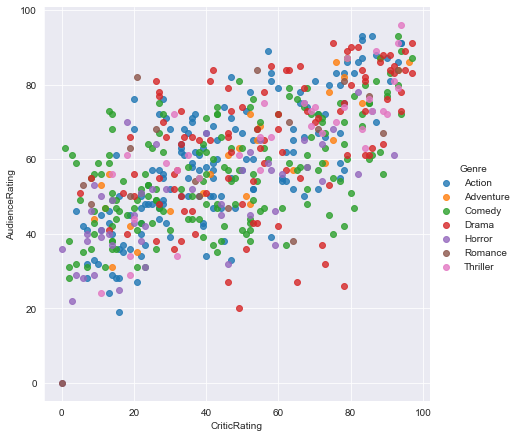

In [30]:
# Visualize audience and critic ratings

# 1) by lmplot() - scatterplot

vis1 = sns.lmplot(data = movies, 
                 x = 'CriticRating',
                 y = 'AudienceRating',
                 fit_reg = False,
                 hue = 'Genre',
                 size = 6,
                 aspect = 1)

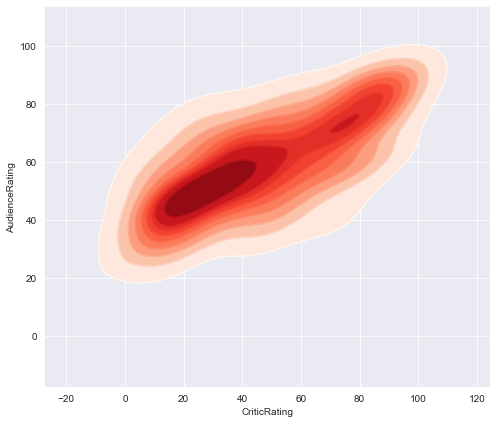

In [31]:
# 2) KDE plot. Shows where the most density is (the center-most circle) and shows how the density is distributed.
plt.figure(figsize = (8,7))
vis2 = sns.kdeplot(movies['CriticRating'],
                   movies['AudienceRating'],
                  shade = True,
                  shade_lowest = False,
                  cmap = 'Reds')

# Tip: to get just the outlines, use the following graph:
vis2 = sns.kdeplot(movies['CriticRating'],
                  movies['AudienceRating'],
                    cmap = 'Reds')
# chart 5
# a combination of both graphs makes the circles more defined.

### Subplots
#### Putting multiple graphs side-by-side for comparison.

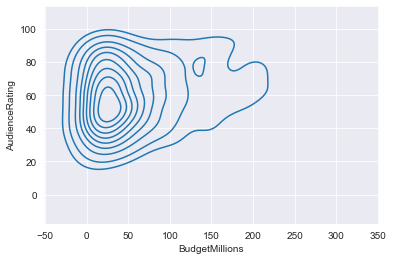

In [32]:
k1 = sns.kdeplot(movies.BudgetMillions,
                movies.AudienceRating)
sns.set_style('dark')
# an audience rating of 20 is not as skewed while 40 and above have higher budgets
# budget of 50 mil has a wider range of ratings in comparison to a budget of 200
# shows a NORMAL distribution

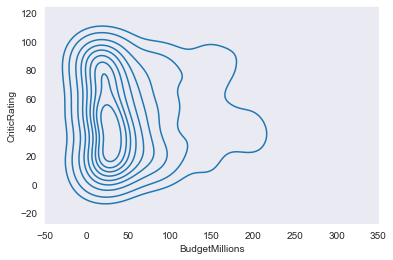

In [33]:
k2 = sns.kdeplot(movies.BudgetMillions,
                movies.CriticRating)
# this plot has a wider range of ratings for each value of budget.

[(-20.0, 160.0)]

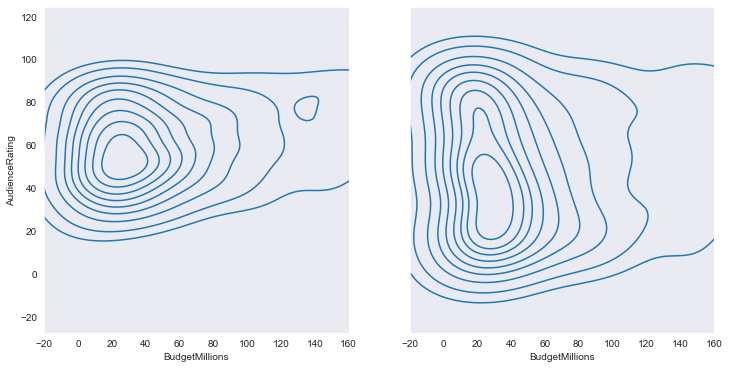

In [34]:
f, axes = plt.subplots(1, 2, figsize = (12, 6), sharex = True, sharey = True) # 1 row, two columns
# sharex makes both plots share the same x-scale (same for sharey)
k1 = sns.kdeplot(movies.BudgetMillions,
                movies.AudienceRating,
                ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillions,
                movies.CriticRating,
                ax = axes[1])
k1.set(xlim = (-20, 160))

If you make axes with two or more rows, axes mecomes a matrix so in the plot, ax = axes[0,1] (the input needs to be the same as subsetting a matrix).

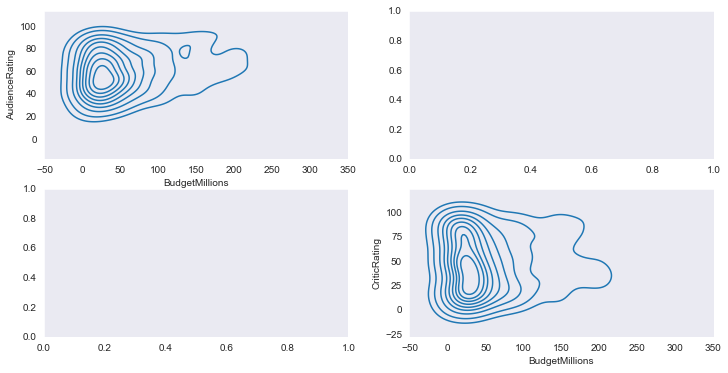

In [35]:
f, axes = plt.subplots(2, 2, figsize = (12, 6)) # 1 row, two columns
k1 = sns.kdeplot(movies.BudgetMillions,
                movies.AudienceRating,
                ax = axes[0, 0])
k2 = sns.kdeplot(movies.BudgetMillions,
                movies.CriticRating,
                ax = axes[1, 1])

[(-20.0, 160.0)]

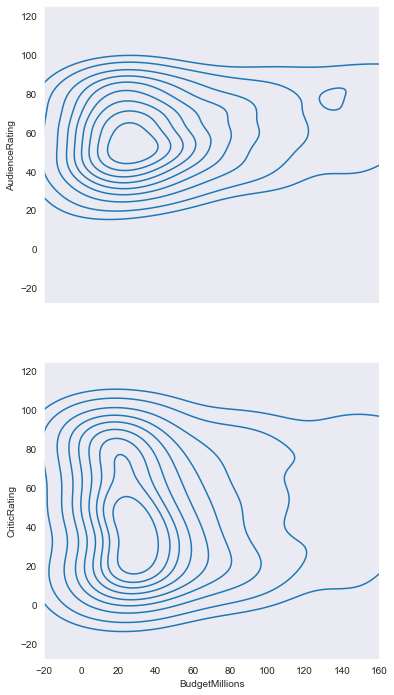

In [36]:
# PRACTICE:
f, axes = plt.subplots(2, 1, figsize = (6, 12), sharex = True, sharey = True) # 1 row, two columns
# sharex makes both plots share the same x-scale (same for sharey)
k1 = sns.kdeplot(movies.BudgetMillions,
                movies.AudienceRating,
                ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillions,
                movies.CriticRating,
                ax = axes[1])
k1.set(xlim = (-20, 160))

### Violin Plots

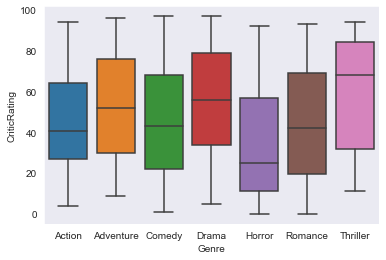

In [37]:
b1 = sns.boxplot(data = movies,
                   x = 'Genre',
                   y = 'CriticRating')
# gives the interquartile range and median

##### If boxplot is compact, most of the points are condensed near the median.
##### If boxplot is long, most of the points are scattered away from the median.

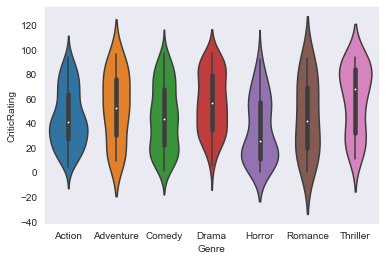

In [38]:
v1 = sns.violinplot(data = movies,
                   x = 'Genre',
                   y = 'CriticRating')
# the width tells you the number of points that have that value of the y-axis, which is not something
# that can be understood from boxplots.

##### Violin plots and boxplots give nearly the same information. Both can be used for a categorical and a quantitative variable.

##### Let us look at a specific genre:

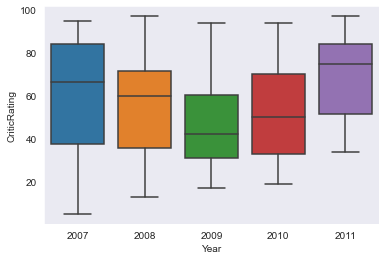

In [39]:
b2 = sns.boxplot(data = movies[movies['Genre'] == 'Drama'],
                   x = 'Year',
                   y = 'CriticRating')

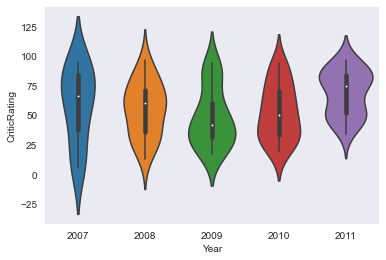

In [40]:
v2 = sns.violinplot(data = movies[movies['Genre'] == 'Drama'],
                   x = 'Year',
                   y = 'CriticRating')

Look at the differences in the condensation of the points of specific ratings for the years 2009 and 2010. 
This cannot be viewed from a boxplot.

### Facet Grids

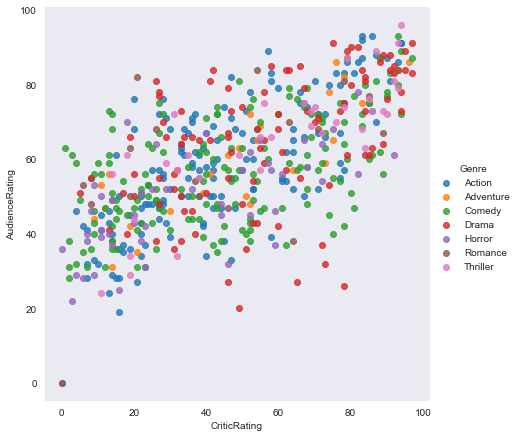

In [41]:
vis1 = sns.lmplot(data = movies, 
                 x = 'CriticRating',
                 y = 'AudienceRating',
                 fit_reg = False,
                 hue = 'Genre',
                 size = 6,
                 aspect = 1)

# this is a cumbersome plot because of how much information there is about both kinds of ratings and 
# the different genres.

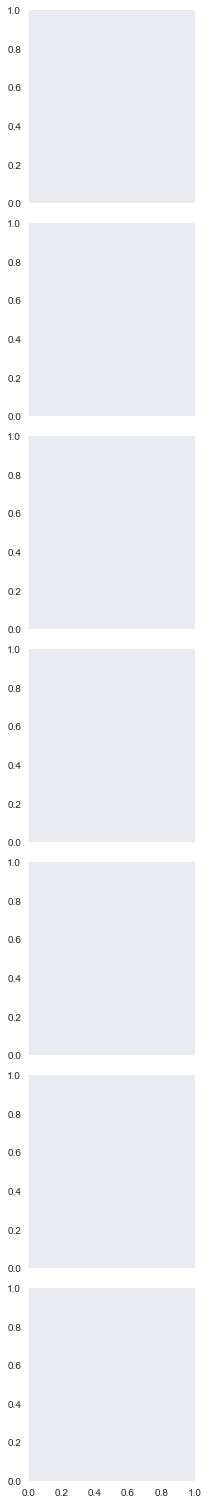

In [42]:
g = sns.FacetGrid(movies,
                 row = 'Genre',
                 hue = 'Genre')

# has one row for one value of Genre

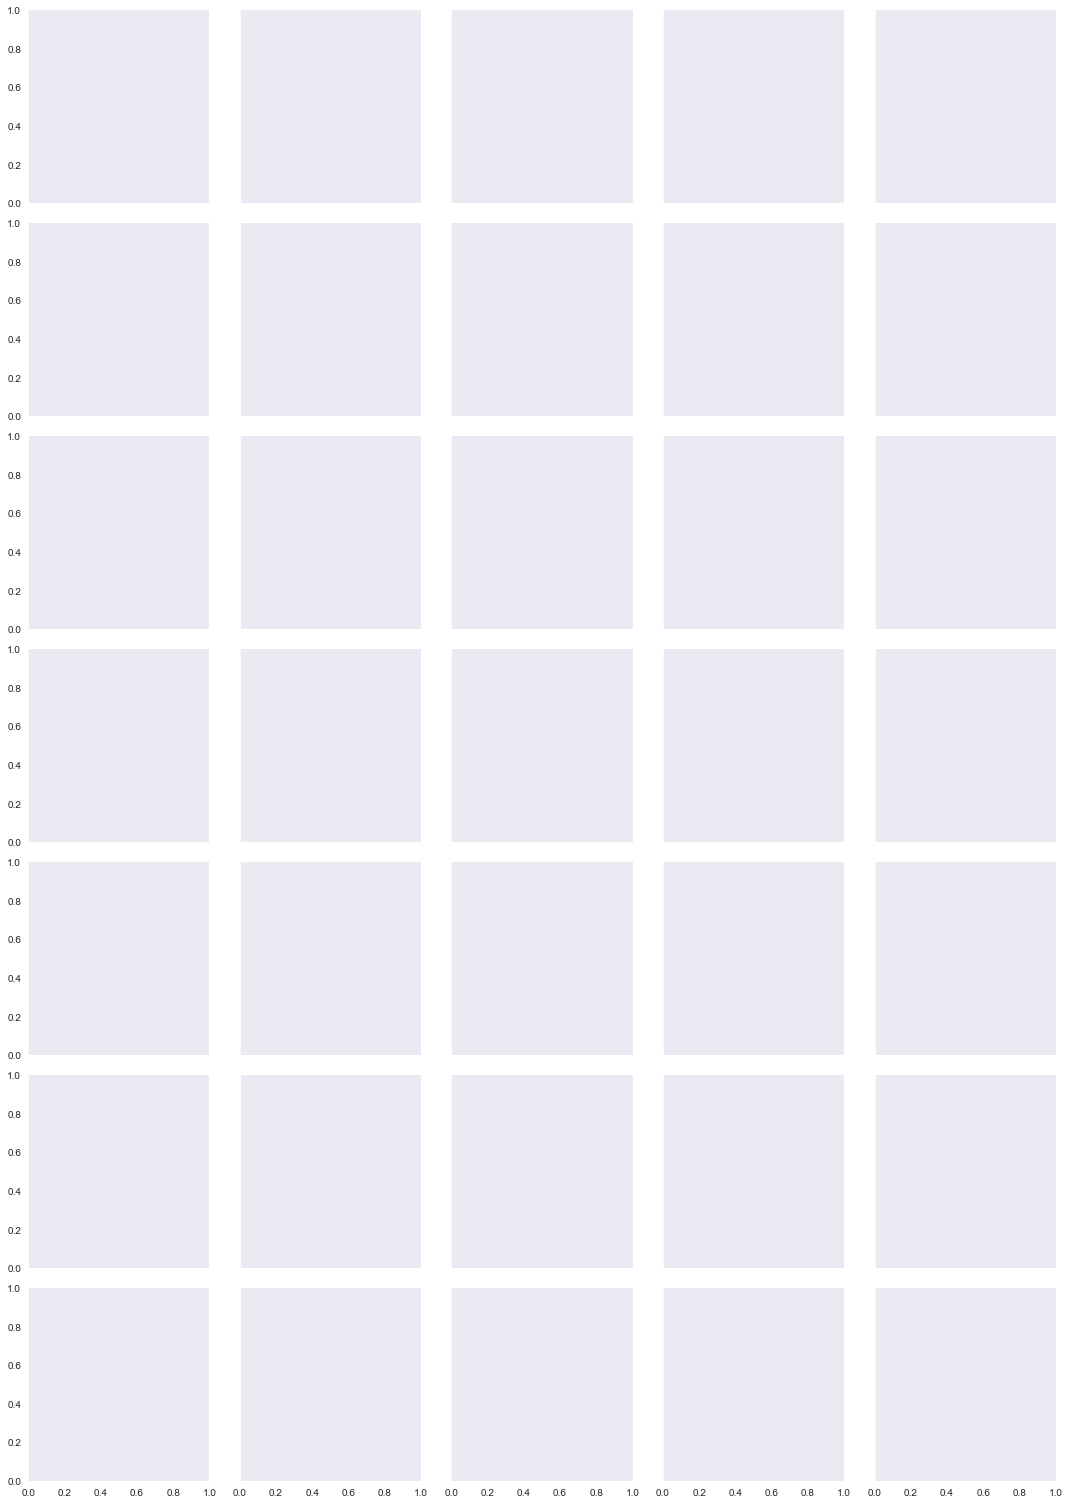

In [43]:
g = sns.FacetGrid(movies,
                  row = 'Genre',
                  col = 'Year',
                  hue = 'Genre')

# gives a massive facetgrid

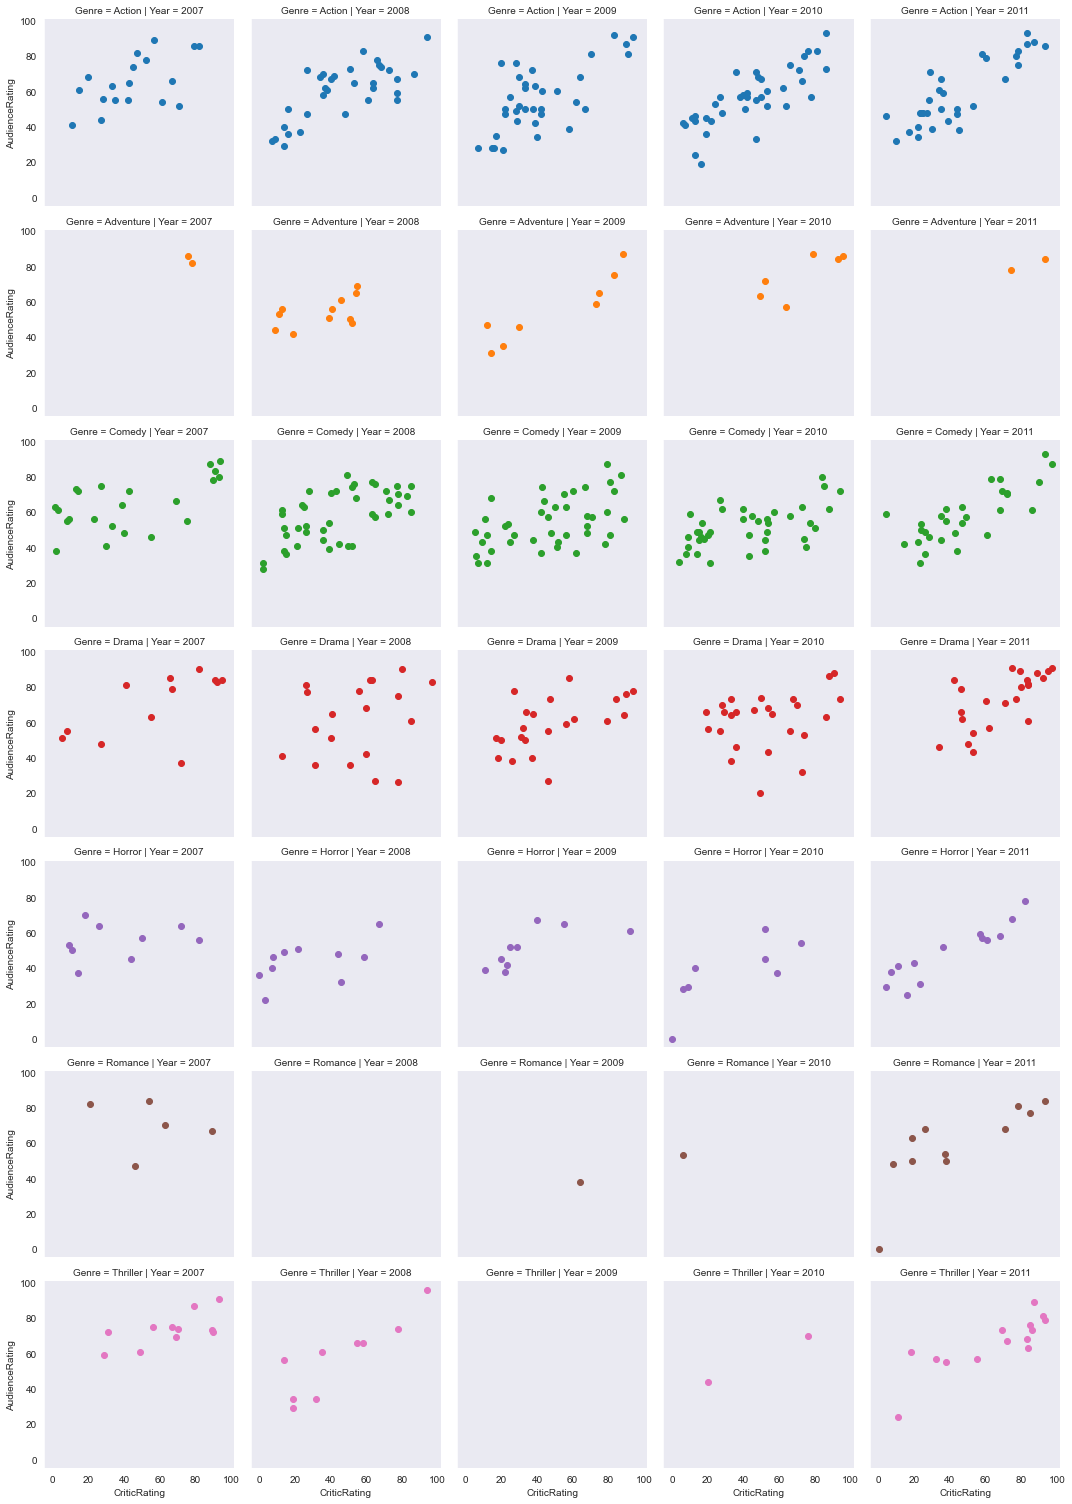

In [44]:
g = sns.FacetGrid(movies,
                  row = 'Genre',
                  col = 'Year',
                  hue = 'Genre')

g = g.map(plt.scatter,
          'CriticRating',
         'AudienceRating') # do not call the plt.scatter() function in g.map because we want to MAP the graph to g.

# Need to run both codes (creating the facet grid and mapping it) together.
# no need to specify the data of columns in map() because that has already been specified in the creation of the grid

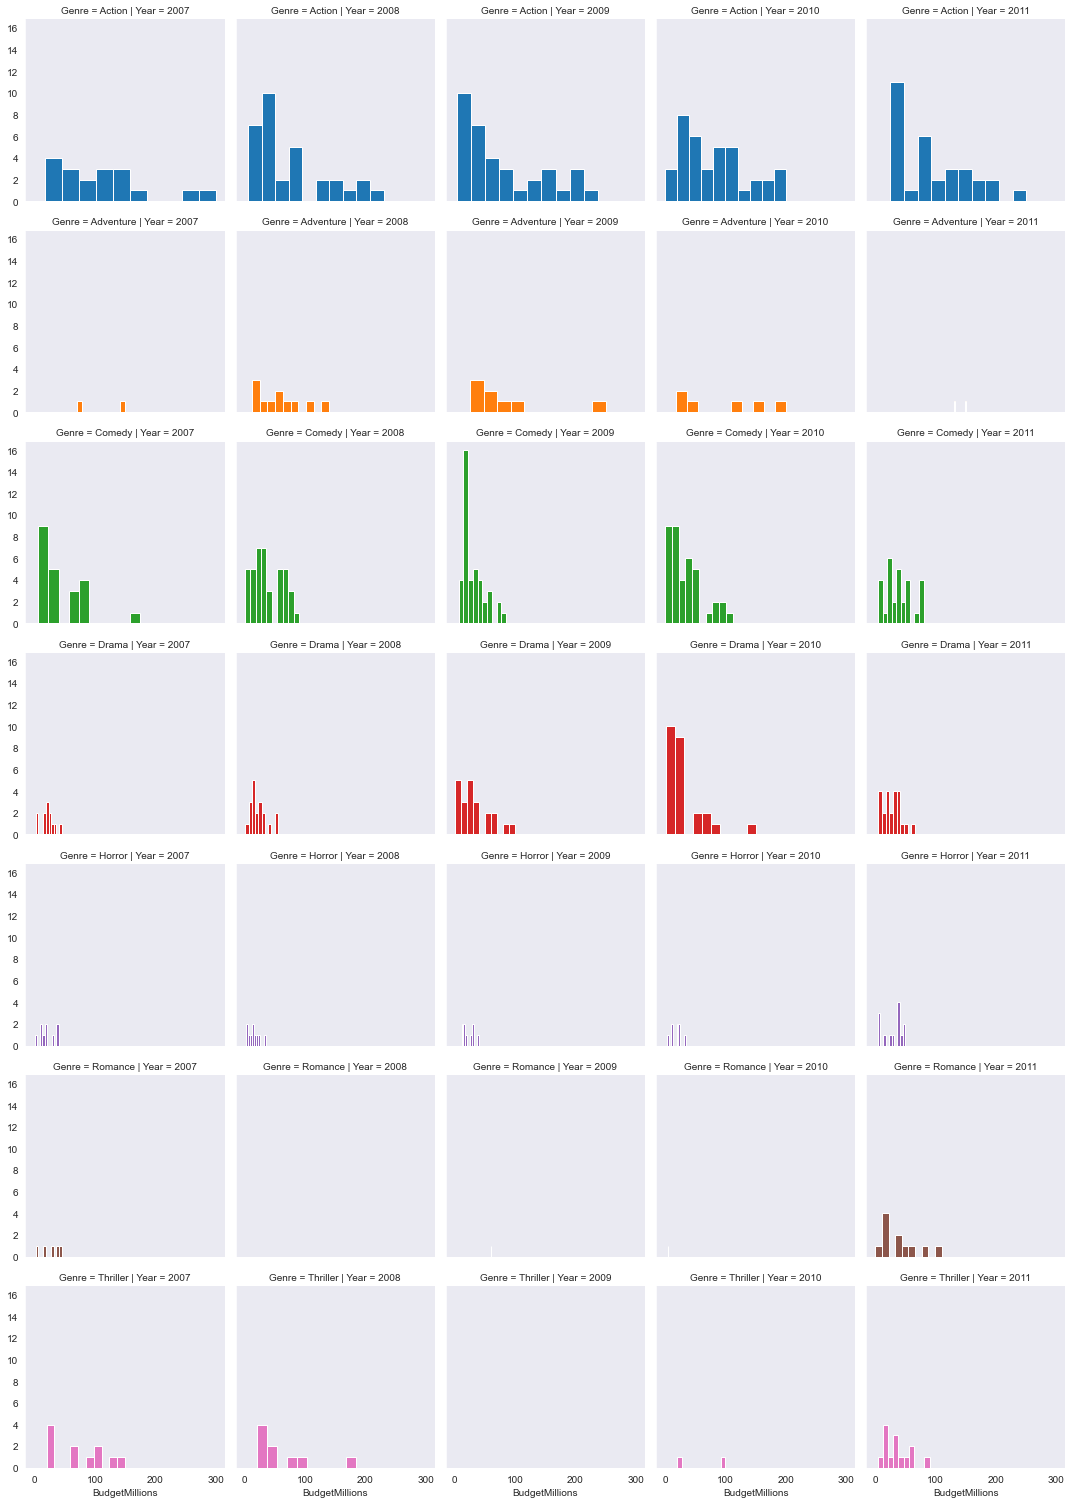

In [45]:
# can populate with ANY type of chart.
# Let us try histograms

g = sns.FacetGrid(movies,
                  row = 'Genre',
                  col = 'Year',
                  hue = 'Genre')

g = g.map(plt.hist,
          'BudgetMillions')

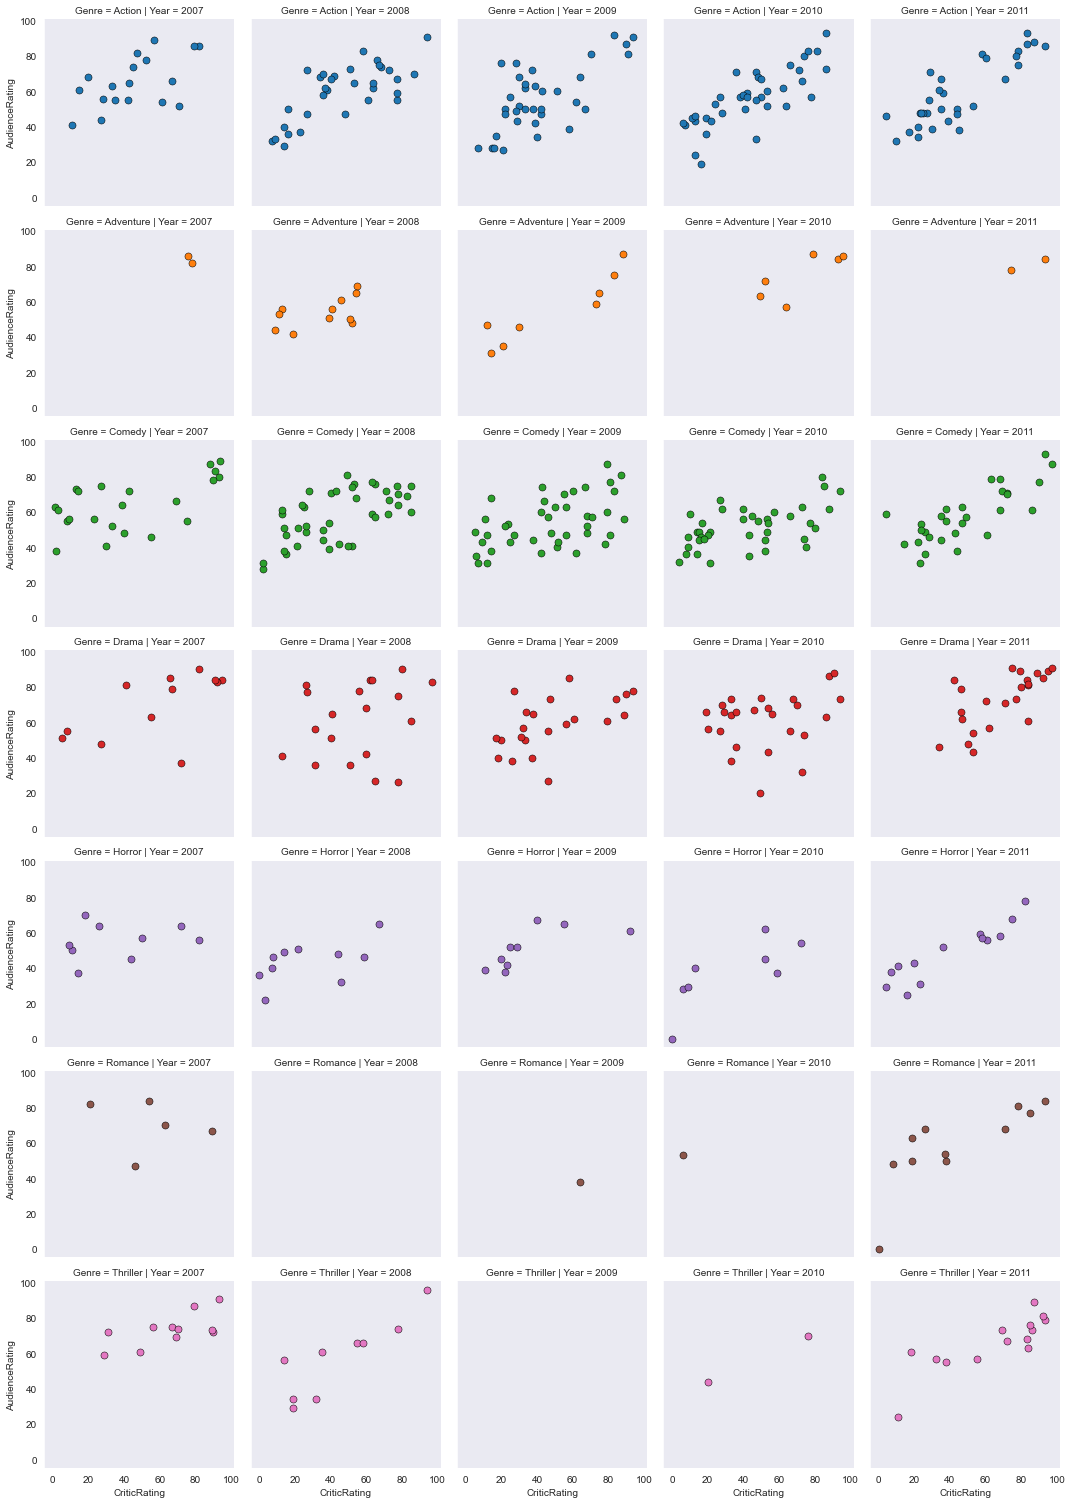

In [46]:
# back to the scatterplot matrix:
g = sns.FacetGrid(movies,
                  row = 'Genre',
                  col = 'Year',
                  hue = 'Genre')
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter,
          'CriticRating',
         'AudienceRating',
         **kws)

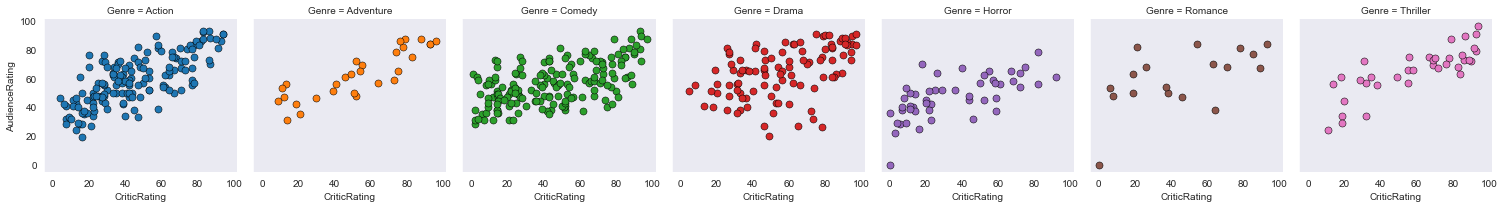

In [47]:
g = sns.FacetGrid(movies,
                  col = 'Genre',
                  hue = 'Genre')
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter,
          'CriticRating',
         'AudienceRating',
         **kws)

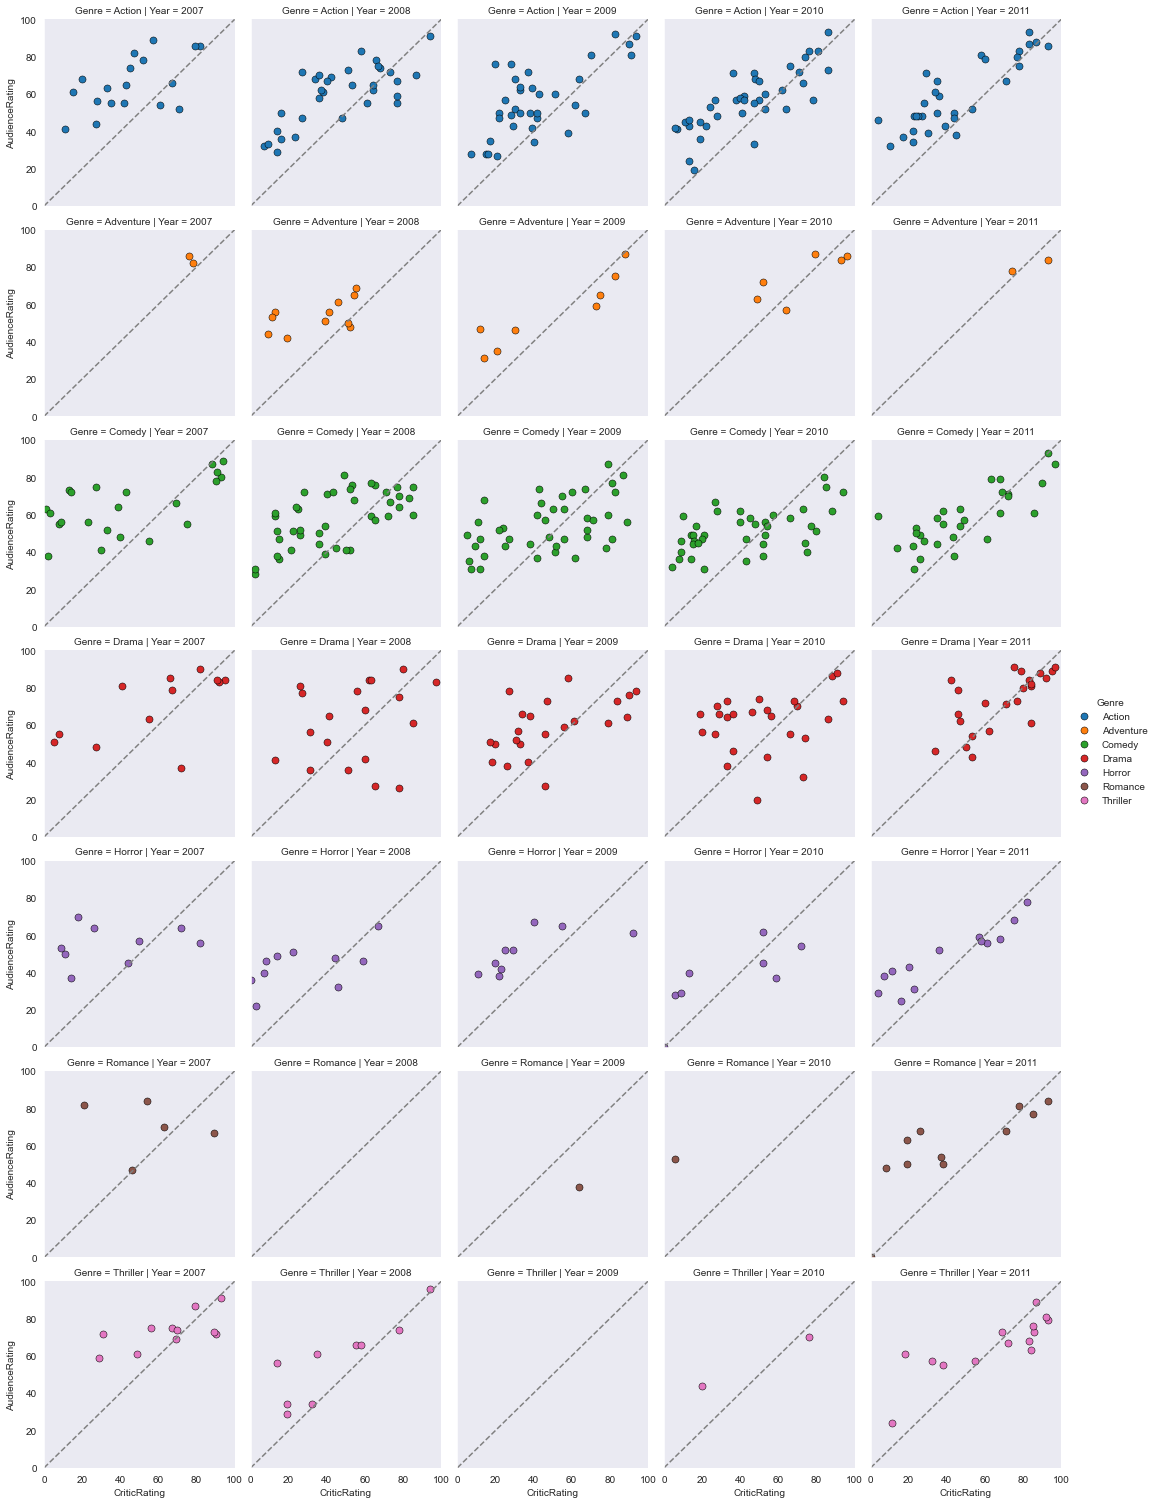

In [48]:
# Controlling Axes and Adding Diagonals:

#creates a facetgrid
g = sns.FacetGrid(movies,
                  row = 'Genre',
                  col = 'Year',
                  hue = 'Genre')

kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')

#fills the facet grid
g = g.map(plt.scatter,
          'CriticRating',
         'AudienceRating',
         **kws)

g.set(xlim = (0, 100), ylim = (0, 100))

for ax in g.axes.flat: # g.axes is an array which contains each grid .flat flattens out the array to make it iterable.
    ax.plot((0, 100), (0, 100), c = 'gray', ls = '--')
# the line allows for an easier comparison between the two types of ratings.
# (0, 100): x-axis range, second (0, 100): y-axis range

# legend
g.add_legend()
# chart 6

---

## Dashboards
##### Combination of charts

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

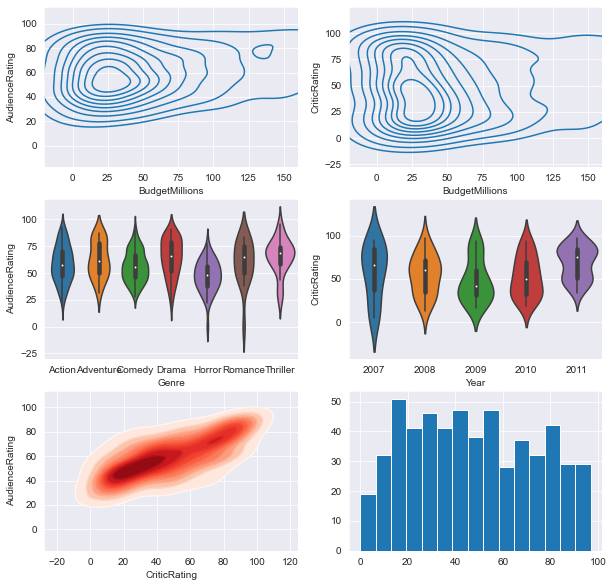

In [50]:
# Creating A Dashboard

sns.set_style('darkgrid')
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
k1 = sns.kdeplot(movies['BudgetMillions'],
                 movies['AudienceRating'],
                 ax = axes[0, 0])
k2 = sns.kdeplot(movies['BudgetMillions'],
                 movies['CriticRating'],
                 ax = axes[0, 1])
k1.set(xlim = (-20, 160))
k2.set(xlim = (-20, 160))

v1 = sns.violinplot(movies['Genre'],
                    movies['AudienceRating'],
                    ax = axes[1, 0])
v2 = sns.violinplot(data = movies[movies['Genre'] == 'Drama'],
                    x = 'Year',
                    y = 'CriticRating',
                    ax = axes[1, 1])

k3 = sns.kdeplot(movies['CriticRating'],
                 movies['AudienceRating'],
                 shade = True,
                 cmap = 'Reds',
                 shade_lowest = False,
                 ax = axes[2, 0])
k3_outline = sns.kdeplot(movies['CriticRating'],
                        movies['AudienceRating'],
                        cmap = 'Reds',
                        ax = axes[2, 0])

# This is not a seaborn plot, so it gives an error.
# h1 = plt.hist(movies['CriticRating'], bins = 15, ax = axes[2, 1])

# instead, instead of plt., use the location the grpah will be put in the subplots chaart:
axes[2, 1].hist(movies['CriticRating'], bins = 15)
plt.show()
# This method does not work for seaborn chart

# axes is a plt generated value, not a seaborn one. Therefore, it needs to be put in a seaborn chart as an argument
# because of 'axes' does not understand seaborn making it necessary to put it as n argument for sns charts.

---

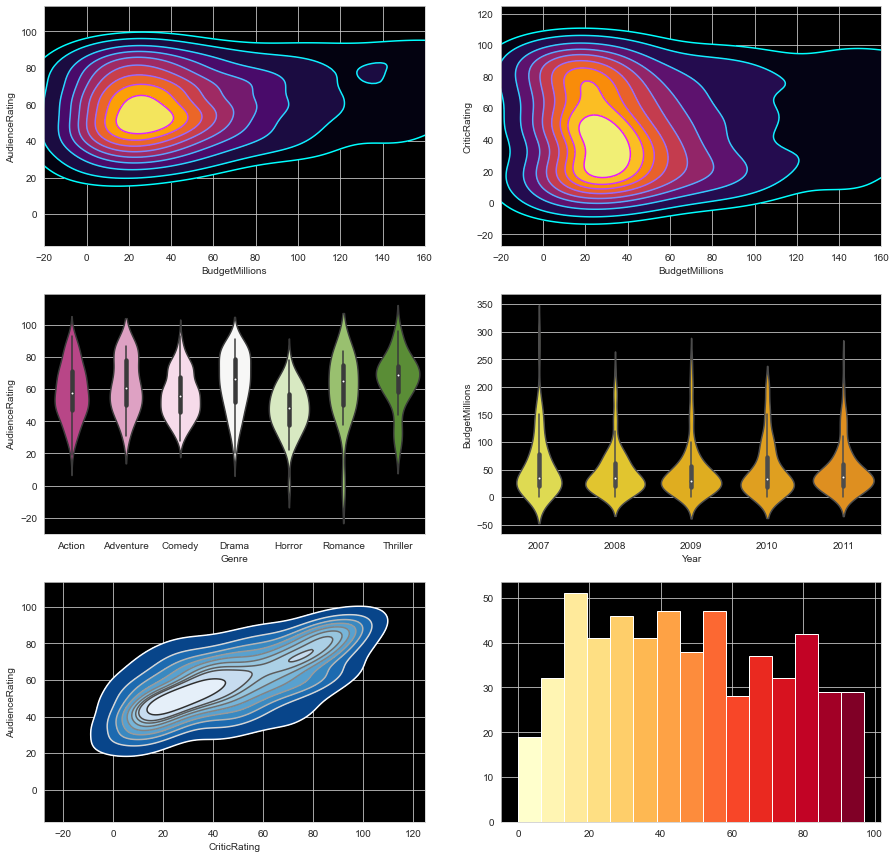

In [51]:
# Styling Dashboards

sns.set_style('whitegrid', {'axes.facecolor':'black'}) # white, whitegrid, dark, darkgrid, ticks
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

# Plot [0, 0]
k1 = sns.kdeplot(movies['BudgetMillions'],
                 movies['AudienceRating'],
                 shade = True,
                 shade_lowest = False,
                 cmap = 'inferno',
                 ax = axes[0, 0])
k1_outline = sns.kdeplot(movies['BudgetMillions'],
                         movies['AudienceRating'],
                        cmap = 'cool',
                        ax = axes[0, 0])

# Plot [0, 1]
k2 = sns.kdeplot(movies['BudgetMillions'],
                 movies['CriticRating'],
                 shade = True,
                 shade_lowest = False,
                 cmap = 'inferno', #or icefire
                 ax = axes[0, 1])
k2_outline = sns.kdeplot(movies['BudgetMillions'],
                         movies['CriticRating'],
                        cmap = 'cool', # or rocket
                        ax = axes[0, 1])
k1.set(xlim = (-20, 160))
k2.set(xlim = (-20, 160))

# Plot [1, 0]
v1 = sns.violinplot(movies['Genre'],
                    movies['AudienceRating'],
                    ax = axes[1, 0],
                   palette = 'PiYG')

# Plot [1, 1]
v2 = sns.violinplot(data = movies,
                    x = 'Year',
                    y = 'BudgetMillions',
                    ax = axes[1, 1],
                   palette = 'Wistia')

# Plot [2, 0]
k3 = sns.kdeplot(movies['CriticRating'],
                 movies['AudienceRating'],
                 shade = True,
                 cmap = 'Blues_r',
                 shade_lowest = False,
                 ax = axes[2, 0])
k3_outline = sns.kdeplot(movies['CriticRating'],
                        movies['AudienceRating'],
                        cmap = 'gist_gray_r',
                        ax = axes[2, 0])

# This is not a seaborn plot, so it gives an error.
# h1 = plt.hist(movies['CriticRating'], bins = 15, ax = axes[2, 1])

# Plot [2, 1]
# instead, instead of plt., use the location the grpah will be put in the subplots chart:
cm = plt.cm.get_cmap('YlOrRd')
n, bins, patches = axes[2, 1].hist(movies['CriticRating'], bins = 15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.show()
# This method does not work for seaborn chart

# axes is a plt generated value, not a seaborn one. Therefore, it needs to be put in a seaborn chart as an argument
# because of 'axes' does not understand seaborn making it necessary to put it as n argument for sns charts.

---

findfont: Font family ['Console'] not found. Falling back to DejaVu Sans.


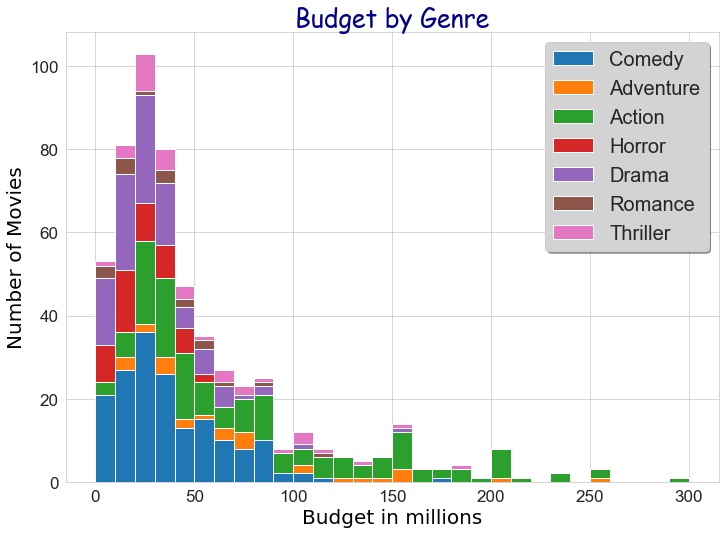

In [52]:
# THEMATIC EDITS
# More refining of the stacked bar chart


# the 'lst' variable seems repetitive. Let us use a loop instead:
labels = list()
lst = [] # or lst = list()
for gen in movies['Genre'].unique(): # or movies.Genre.cat.categories
    lst.append(movies[movies['Genre'] == gen].BudgetMillions)
    labels.append(gen)

sns.set_style('whitegrid')
fig, ax = plt.subplots()

# change size:
fig.set_size_inches(11.7, 8.27) # size of an A4 paper

plt.hist(lst,
         bins = 30,
         stacked = True,
         rwidth = 1,
         label = labels) # rwidth specifies the space between the bars
# label = requires a list of labels


plt.legend()
plt.xlabel('Budget in millions',
           fontsize = 20,
           fontname = 'Console',
           color = 'black')

plt.ylabel('Number of Movies',
           fontsize = 20,
           fontname = 'Console',
           color = 'black')

plt.title('Budget by Genre',
          fontsize = 25,
          color = 'darkblue',
          fontname = 'Comic Sans MS')

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

plt.legend(prop = {'size' : 20},
           frameon = True,
           fancybox = True,
           shadow = True,
           framealpha = 1,
           facecolor = 'lightgray')
plt.show()

[  6.46666667  19.4         32.33333333  45.26666667  58.2
  71.13333333  84.06666667  97.         109.93333333 122.86666667
 135.8        148.73333333 161.66666667 174.6        187.53333333]


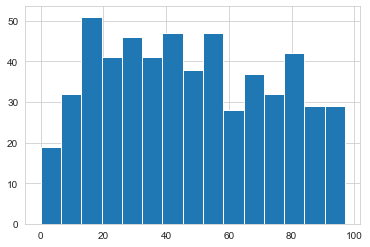

In [65]:
cm = plt.cm.get_cmap('YlOrRd')
n, bins, patches = plt.hist(movies['CriticRating'], bins = 15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
print(bins[:-1] + bins[1:])
#col = bin_centers - min(bin_centers)
#col /= max(col)

#for c, p in zip(col, patches):
 #   plt.setp(p, 'facecolor', cm(c))
plt.show()